## Задача 1. Линейная регрессия, метод градиентного спуска

#### Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [1]:
import numpy as np

In [2]:
def my_mse(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    diff = np.subtract(y, y_pred)
    squared_diff = np.square(diff)
    return squared_diff.mean()

def my_rmse(y, y_pred):
    return (my_mse(y, y_pred)) ** 0.5

def my_r2(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    diff1 = np.subtract(y, y_pred)
    squared_diff1 = np.square(diff1)
    diff2 = y - y.mean()
    squared_diff2 = np.square(diff2)
    return 1-squared_diff1.sum()/squared_diff2.sum()

def my_metrics(y, predicts):
    mse = my_mse(y, predicts)
    rmse = my_rmse(y, predicts)
    r2 = my_r2(y, predicts)
    return mse, rmse, r2

def gradient_step(X, y, curr_weights = 0, curr_bias = 0, learning_rate = 0.001):
    # Очередное предсказание
    y_pred = np.dot(X, curr_weights) + curr_bias

    new_weights = 0
    new_bias = 0
    
    # Частные производные
    partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_pred - y)))
    partial_b = (1 / X.shape[0]) * (2 * np.sum(y_pred - y))
    
    # Обновление весов и смещения
    new_weights = curr_weights - learning_rate * partial_w
    new_bias = curr_bias - learning_rate * partial_b
    
    return new_weights, new_bias

def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    # Инициализация весов и смещения
    weights = np.zeros(X.shape[1])
    bias = 0
    
    # Градиентный спуск
    for i in range(n_iterations):
        weights, bias = gradient_step(X, y, weights, bias, learning_rate)

    return weights, bias

#### Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целового признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин тут (целевой признак для предсказания --- **price**).

Данные - California Housing Dataset https://www.kaggle.com/datasets/camnugent/california-housing-prices.
Целевой признак для предсказания `median_house_value`.

#### Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

In [3]:
import pandas as pd

data = pd.read_csv("housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


0. `longitude` - долгота.
1. `latitude` - широта.
2. `housing_median_age` - средний возраст жилья.
3. `total_rooms` - всего комнат.
4. `total_bedrooms` - всего спален.
5. `population` - общее количество людей, проживающих в квартале.
6. `households` - общее количество домохозяйств в квартале.
7. `median_income` - средний доход жильцов в многоквартирном доме (десятки тысяч долларов США).
8. `median_house_value` - средняя стоимость жилья в квартале  (доллары США).
9. `ocean_proximity` - удаленность от океана.


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


1. Большинство жилья имеет возраст от 18 до 37 лет.
2. У большинства домов от 1448 до 3148 комнат.
3. У большинства домов от 296 до 647 спален.
4. В большинстве домов живет от 787 до 1725 людей.
5. В большинстве домов от 280 до 605 домохозяйств.
6. У большинства жильцов  доход составляет от 2.6 до 4.7 десятков тысяч долларов США.
7. Большинство жилищ стоят от 119600 до 264725 долларов США.

Проверка наличия пропусков.

In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

207 пропусков в `total_bedrooms`.

Заполнение null в `total_bedrooms` средним значением 538.

In [7]:
data['total_bedrooms'].fillna(538, inplace=True)
data['total_bedrooms'] = data['total_bedrooms'].astype('int')

Повторная проверка наличия пропусков.

In [8]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Пропусков нет.

#### Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

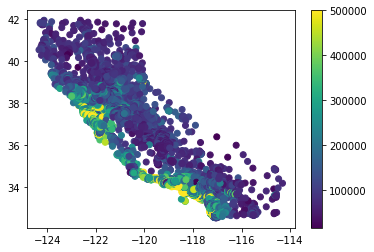

In [10]:
plt.scatter(data = data , x = "longitude" , y = "latitude" , c = data["median_house_value"]  )
plt.colorbar ()
plt.show()

Чем ближе к побережью океана, тем дороже.

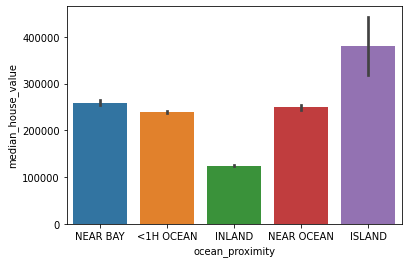

In [11]:
sns.barplot(x = "ocean_proximity",y = "median_house_value", data = data)

Самое дорогое жилье на островах.

Проверка корреляции признаков между собой.

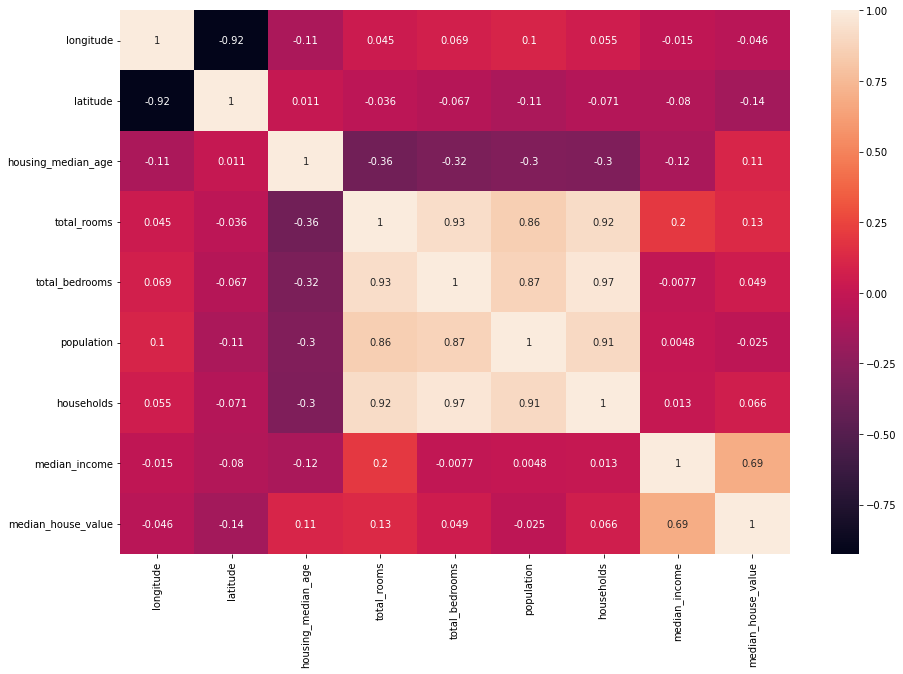

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cbar = True , annot=True)

- Сильная корреляция признаков `households`, `population`, `total bedrooms`, `total rooms`. Из этих признаков можно попробовать оставить один из пары `households`, `population` и один из пары `total_bedrooms`, `total_rooms` и сравнить модели. Cравнение моделей приведено после основных заданий в разделе про RFE.
- Сильная корреляция признаков `median_house_value`, `median_income`. При этом `median_house_value` является целевым признаком, поэтому его корреляцию в расчет не берем.

#### При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Кодирование категориального признака `ocean_proximity`.

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['ocean_proximity'] = encoder.fit_transform(data['ocean_proximity'])

Результаты кодирования.

In [14]:
data["ocean_proximity"].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

#### Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis = 1).values
y = data['median_house_value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=19)

#### При обучении моделей использовать масштабирование данных.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.

In [17]:
gd_weights, gd_bias = gradient_descent(X_train,y_train)
gd_predicts_train = np.dot(X_train, gd_weights) + gd_bias
gd_predicts_test = np.dot(X_test, gd_weights) + gd_bias

In [18]:
errors = pd.DataFrame(my_metrics(y_train, gd_predicts_train),
                         ['MSE', 'RMSE', 'R2'], columns=['gd train'])

errors.insert(errors.shape[1], 'gd test',
              my_metrics(y_test, gd_predicts_test), True)

In [19]:
errors.style.format("{:.2f}")

,gd train,gd test
MSE,4920806614.52,4904858456.40
RMSE,70148.46,70034.69
R2,0.63,0.63


Качество модели на тренировочной и на тестовой выборке почти не отличается.

#### Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с вашей реализацией.

In [20]:
from sklearn.linear_model import Ridge

rdg_model = Ridge()
rdg_model.fit(X_train, y_train)
rdg_predicts_train = rdg_model.predict(X_train)
rdg_predicts_test = rdg_model.predict(X_test)

errors.insert(errors.shape[1], 'skl Ridge train',
              my_metrics(y_train, rdg_predicts_train), True)

errors.insert(errors.shape[1], 'skl Ridge test',
              my_metrics(y_test, rdg_predicts_test), True)

In [21]:
errors.style.format("{:.2f}")

,gd train,gd test,skl Ridge train,skl Ridge test
MSE,4920806614.52,4904858456.40,4842253194.33,4863964626.26
RMSE,70148.46,70034.69,69586.30,69742.13
R2,0.63,0.63,0.64,0.64


Качество реализации немногим хуже библиотечных реализаций по заданным метрикам.

#### Повторить тоже самое, но используя кросс-валидацию.

In [22]:
metrics_summary = pd.DataFrame([], ['MSE', 'RMSE', 'R2'], columns=[])

In [23]:
from sklearn.model_selection import KFold, cross_validate
from statistics import mean

rdg_model = Ridge()
scoring = {'neg_mse': 'neg_mean_squared_error',
           'neg_rmse': 'neg_root_mean_squared_error',
           'r2': 'r2'}

for i in range(2,20):
  k_folds = KFold(n_splits = i, random_state=19, shuffle=True)
  metrics_train = cross_validate(rdg_model, X, y, cv = k_folds, scoring=scoring)

  metrics_summary.at['MSE', f'{i}'] = -1*mean(metrics_train['test_neg_mse'])
  metrics_summary.at['RMSE', f'{i}'] = -1*mean(metrics_train['test_neg_rmse'])
  metrics_summary.at['R2', f'{i}'] = mean(metrics_train['test_r2'])

metrics_summary['E'] = metrics_summary.iloc[:, 0:8].mean(axis=1)
metrics_summary['STD'] = metrics_summary.iloc[:, 0:8].std(axis=1)

#### Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

In [24]:
metrics_summary.style.format("{:.2f}")

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,E,STD
MSE,4884691142.75,4872577865.87,4870617210.25,4872747423.56,4870118702.07,4876113842.66,4874772227.70,4875828683.61,4879016173.42,4876956522.25,4870203686.39,4873817909.62,4874846711.18,4875886249.01,4873807234.57,4873905254.84,4869454974.68,4874333145.39,4874683387.31,4614763.44
RMSE,69888.37,69802.76,69786.88,69798.32,69778.69,69807.43,69802.11,69808.11,69822.13,69813.43,69768.22,69781.76,69783.13,69795.35,69770.48,69748.79,69736.24,69769.45,69809.08,33.62
R2,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.00


Кросс-валидация с моделью Ridge с числом фолдов 2..19 показала нулевой разброс нормированной среднеквадратичной ошибки ($R^2$). При этом сама ошибка на 0.01 меньше таковой из сравнения Ridge с моей реализацией линейной регрессии.

Две других ошибки имеют небольшое стандартное отклонение в сравнении с мат. ожиданием.

По итогам сравнения использование кросс-валидации и Ridge не дало улучшения метрик работы модели.

#### * (+2 балла) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.

In [25]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    # Инициализация весов и смещения
    weights = np.zeros(X.shape[1])
    bias = 0
    
    # Стохастический градиентный спуск
    for i in range(n_iterations):
        indice = np.random.choice(X_train.shape[0], 1, replace=False)
        shuffle_X = X[indice]
        shuffle_y = y[indice]
        weights, bias = gradient_step(shuffle_X, shuffle_y, weights,
                                      bias, learning_rate)

    return weights, bias

In [26]:
sgd_weights, sgd_bias = stochastic_gradient_descent(X = X_train, y = y_train,
                                                    learning_rate = 0.01,
                                                    n_iterations=10000)
sgd_predicts_test = np.dot(X_test, sgd_weights) + sgd_bias
sgd_predicts_train = np.dot(X_train, sgd_weights) + sgd_bias

In [27]:
errors.insert(errors.shape[1], 'sgd train',
              my_metrics(y_train, sgd_predicts_train), True)
errors.insert(errors.shape[1], 'sgd test',
              my_metrics(y_test, sgd_predicts_test), True)

#### * (+2 балла) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

In [28]:
def mb_stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, batch_size = 256):
    # Инициализация весов и смещения
    weights = np.zeros(X.shape[1])
    bias = 0
    
    # мини-пакетный градиентный спуск
    for i in range(n_iterations):
        indice = np.random.choice(X_train.shape[0], batch_size, replace=False)
        shuffle_X = X[indice]
        shuffle_y = y[indice]
        weights, bias = gradient_step(shuffle_X, shuffle_y, weights, bias, learning_rate)

    return weights, bias

In [29]:
mb_sgd_weights, mb_sgd_bias = mb_stochastic_gradient_descent(X = X_train, y = y_train, learning_rate = 0.01, n_iterations=10000)
mb_sgd_predicts_train = np.dot(X_train, mb_sgd_weights) + mb_sgd_bias
mb_sgd_predicts_test = np.dot(X_test, mb_sgd_weights) + mb_sgd_bias

In [30]:
errors.insert(errors.shape[1], 'mb sgd train',
              my_metrics(y_train, mb_sgd_predicts_train), True)
errors.insert(errors.shape[1], 'mb sgd test',
              my_metrics(y_test, mb_sgd_predicts_test), True)

#### Итоговая таблица сравнения метрик моделей

In [31]:
errors.style.format("{:.2f}")

,gd train,gd test,skl Ridge train,skl Ridge test,sgd train,sgd test,mb sgd train,mb sgd test
MSE,4920806614.52,4904858456.40,4842253194.33,4863964626.26,5564295349.29,5537522276.59,4845474696.45,4867302992.95
RMSE,70148.46,70034.69,69586.30,69742.13,74594.20,74414.53,69609.44,69766.06
R2,0.63,0.63,0.64,0.64,0.58,0.59,0.64,0.64


Из всех реализаций к библиотечному Ridge по метрикам ближе всех оказалась реализация мини-пакетного градиентного спуска (столбцы `mb sgd train`, `mb sgd test`). Хуже всего себя показала реализация стохастического градиентного спуска (столбцы `sgd train`, `sgd test`). Возможно изменение итоговых результов после подбора оптимальных значений гиперпараметров и обучения моделей с найденными гиперпараметрами.

#### * (+1 балл) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE).

На этапе EDA была обнаружена корреляция между признаками  `households`, `population`, `total bedrooms`, `total rooms`. Предполагая, что из 4 признаков нужно оставить два, используем RFE с параметром `n_features_to_select` равным 7, чтобы оставить 7 из 9 признаков.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select=7, step=1)
rfe = rfe.fit(X, y)
rfe_features = rfe.get_feature_names_out(input_features = data.drop('median_house_value', axis = 1).columns)

In [33]:
X_rfe = data[rfe_features]
X_rfe

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,129,126.0,8.3252,3
1,-122.22,37.86,21.0,1106,1138.0,8.3014,3
2,-122.24,37.85,52.0,190,177.0,7.2574,3
3,-122.25,37.85,52.0,235,219.0,5.6431,3
4,-122.25,37.85,52.0,280,259.0,3.8462,3
...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,374,330.0,1.5603,1
20636,-121.21,39.49,18.0,150,114.0,2.5568,1
20637,-121.22,39.43,17.0,485,433.0,1.7000,1
20638,-121.32,39.43,18.0,409,349.0,1.8672,1


Остались признаки `longitude`, `latitude`, `housing_median_age`, ` 	total_bedrooms`, `households`, `median_income`, `ocean_proximity`.
Признаки `total_rooms` и `population` были отсечены RFE как наименее важные. Это совпадает с предложением *оставить один из пары `households`, `population` и один из пары `total_bedrooms`, `total_rooms`*  из раздела EDA.

Обучим линейную регрессию и сравним результат.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.33 , random_state=19)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
rfe_gd_weights, rfe_gd_bias = gradient_descent(X_train,y_train)

rfe_gd_predicts_train = np.dot(X_train, rfe_gd_weights) + rfe_gd_bias
rfe_gd_predicts_test = np.dot(X_test, rfe_gd_weights) + rfe_gd_bias

rfe_errors = pd.DataFrame(my_metrics(y_train, rfe_gd_predicts_train),
                         ['MSE', 'RMSE', 'R2'],
                          columns=['(rfe) gd train'])
rfe_errors.insert(rfe_errors.shape[1], '(rfe) gd test',
                  my_metrics(y_test, rfe_gd_predicts_test), True)

In [37]:
rfe_rdg_model = Ridge()
rfe_rdg_model.fit(X_train, y_train)
rfe_rdg_predictions_train = rfe_rdg_model.predict(X_train)
rfe_rdg_predictions_test = rfe_rdg_model.predict(X_test)

rfe_errors.insert(rfe_errors.shape[1], '(rfe) skl Ridge train',
                  my_metrics(y_train, rfe_rdg_predictions_train), True)
rfe_errors.insert(rfe_errors.shape[1], '(rfe) skl Ridge test',
                  my_metrics(y_test, rfe_rdg_predictions_test), True)

In [38]:
rfe_sgd_weights, rfe_sgd_bias = stochastic_gradient_descent(X = X_train,
                                                          y = y_train,
                                                          learning_rate = 0.01,
                                                          n_iterations=10000)

rfe_sgd_predicts_train = np.dot(X_train, rfe_sgd_weights) + rfe_sgd_bias
rfe_sgd_predicts_test = np.dot(X_test, rfe_sgd_weights) + rfe_gd_bias

rfe_errors.insert(rfe_errors.shape[1], '(rfe) sgd train',
                  my_metrics(y_train, rfe_sgd_predicts_train), True)
rfe_errors.insert(rfe_errors.shape[1], '(rfe) sgd test',
                  my_metrics(y_test, rfe_sgd_predicts_test), True)

In [39]:
rfe_mb_sgd_weights, rfe_mb_sgd_bias = mb_stochastic_gradient_descent(X = X_train,
                                                          y = y_train,
                                                          learning_rate = 0.01,
                                                          n_iterations=10000)

rfe_mb_sgd_predicts_train = np.dot(X_train, rfe_mb_sgd_weights) + rfe_mb_sgd_bias
rfe_mb_sgd_predicts_test = np.dot(X_test, rfe_mb_sgd_weights) + rfe_mb_sgd_bias

rfe_errors.insert(rfe_errors.shape[1], '(rfe) mb sgd train',
                  my_metrics(y_train, rfe_mb_sgd_predicts_train), True)
rfe_errors.insert(rfe_errors.shape[1], '(rfe) mb sgd test',
                  my_metrics(y_test, rfe_mb_sgd_predicts_test), True)

Метрики моделей, обученных после применения RFE к датасету.

In [40]:
rfe_errors.style.format("{:.2f}")

,(rfe) gd train,(rfe) gd test,(rfe) skl Ridge train,(rfe) skl Ridge test,(rfe) sgd train,(rfe) sgd test,(rfe) mb sgd train,(rfe) mb sgd test
MSE,5396462636.61,5292711516.56,5287942768.46,5201590285.26,5488127273.22,5328080832.74,5288892583.41,5202514651.69
RMSE,73460.62,72751.02,72718.24,72122.05,74081.90,72993.70,72724.77,72128.46
R2,0.59,0.60,0.60,0.61,0.59,0.60,0.60,0.61


Метрики моделей без применения RFE к датасету.

In [41]:
errors.style.format("{:.2f}")

,gd train,gd test,skl Ridge train,skl Ridge test,sgd train,sgd test,mb sgd train,mb sgd test
MSE,4920806614.52,4904858456.40,4842253194.33,4863964626.26,5564295349.29,5537522276.59,4845474696.45,4867302992.95
RMSE,70148.46,70034.69,69586.30,69742.13,74594.20,74414.53,69609.44,69766.06
R2,0.63,0.63,0.64,0.64,0.58,0.59,0.64,0.64


Уменьшение числа признаков с 9 до 7 ухудшило метрики моделей: $R^2$ уменьшилась на 0.03-0.04, ошибки MSE и RMSE увеличились.

Попробуем кросс-валидацию на датасете после использования RFE и модели Ridge.

In [42]:
rfe_metrics_summary = pd.DataFrame([], ['MSE', 'RMSE', 'R2'], columns=[])

In [43]:
from sklearn.model_selection import KFold, cross_validate
from statistics import mean

scoring = {'neg_mse': 'neg_mean_squared_error',
           'neg_rmse': 'neg_root_mean_squared_error',
           'r2': 'r2'}

rdg_model = Ridge()
for i in range(2,20):
  k_folds = KFold(n_splits = i, random_state=19, shuffle=True)
  metrics_train = cross_validate(rdg_model, X, y,
                                 cv = k_folds,
                                 scoring = scoring)

  rfe_metrics_summary.at['MSE', f'{i}'] =-1 *mean(metrics_train['test_neg_mse'])
  rfe_metrics_summary.at['RMSE', f'{i}'] = -1 * mean(metrics_train['test_neg_rmse'])
  rfe_metrics_summary.at['R2', f'{i}'] = mean(metrics_train['test_r2'])


rfe_metrics_summary['E'] = rfe_metrics_summary.iloc[:, 0:8].mean(axis=1)
rfe_metrics_summary['STD'] = rfe_metrics_summary.iloc[:, 0:8].std(axis=1)

In [44]:
rfe_metrics_summary.style.format("{:.2f}")

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,E,STD
MSE,4884691142.75,4872577865.87,4870617210.25,4872747423.56,4870118702.07,4876113842.66,4874772227.70,4875828683.61,4879016173.42,4876956522.25,4870203686.39,4873817909.62,4874846711.18,4875886249.01,4873807234.57,4873905254.84,4869454974.68,4874333145.39,4874683387.31,4614763.44
RMSE,69888.37,69802.76,69786.88,69798.32,69778.69,69807.43,69802.11,69808.11,69822.13,69813.43,69768.22,69781.76,69783.13,69795.35,69770.48,69748.79,69736.24,69769.45,69809.08,33.62
R2,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.00


Кросс валидация на линейной регрессии Ridge с числом фолдов 2..19 показала нулевой разброс нормированной среднеквадратичной ошибки ($R^2$) при одновременном улучшении всех метрик.
Получается, что кросс-валидация после RFE улучшила работу модели Ridge, однако метрики немного хуже, чем без отбора признаков. 